# Titanic : Predict the passenger's possibility of the survival 

Import the necessary packages <br/>

Import the dataset from csv to pandas dataframe

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
train_df=pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h3>Data preprocessing for train data</h3><br/>
   1. Check the missing values<br/>
   2. Fill the missing values with the mean,median or mode based on the distribution of the attribute.<br/>
   3. Drop the columns that are not requied

In [4]:
# To check missing values in the train dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print("Percentage of missing values in Age column %.2f%%" % ((train_df['Age'].isnull().sum()/train_df.shape[0]) * 100))
print("Percentage of missing values in Cabin column %.2f%%" % ((train_df['Cabin'].isnull().sum()/train_df.shape[0]) * 100))
print("Percentage of missing values in Embarked column %.2f%%" % ((train_df['Embarked'].isnull().sum()/train_df.shape[0]) * 100))


Percentage of missing values in Age column 19.87%
Percentage of missing values in Cabin column 77.10%
Percentage of missing values in Embarked column 0.22%


In [6]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_data.drop(['PassengerId','Cabin', 'Ticket','Name'], axis=1, inplace=True)

In [7]:
# SibSp and Parch are the informations about number of sibling/spouse abroad and number of parent/child abroad. 
# These columns can be combined into a single column of boolean values whether the passenger travelled alone or not
train_data["IsTravelAlone"] = np.where((train_data['SibSp'] + train_data['Parch']) >0,0,1)
train_data.drop(['SibSp','Parch'], axis=1, inplace=True)
train_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsTravelAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [8]:
train_data = pd.get_dummies(train_data,columns = ["Pclass","Embarked","Sex"])
train_data.drop(['Sex_female'], axis=1, inplace=True)

In [42]:
print(train_data.head())
print(train_data.isnull().sum())
train_data.head()

   Survived   Age     Fare  IsTravelAlone  Pclass_1  Pclass_2  Pclass_3  \
0         0  22.0   7.2500              0         0         0         1   
1         1  38.0  71.2833              0         1         0         0   
2         1  26.0   7.9250              1         0         0         1   
3         1  35.0  53.1000              0         1         0         0   
4         0  35.0   8.0500              1         0         0         1   

   Embarked_C  Embarked_Q  Embarked_S  Sex_male  
0           0           0           1         1  
1           1           0           0         0  
2           0           0           1         0  
3           0           0           1         0  
4           0           0           1         1  
Survived         0
Age              0
Fare             0
IsTravelAlone    0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Sex_male         0
dtype: int64


,Survived,Age,Fare,IsTravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


<h3>Data preprocessing for test data</h3><br/>

In [10]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
test_data=test_df.copy()
test_data["Age"].fillna(test_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data["IsTravelAlone"] = np.where((test_data['SibSp'] + test_data['Parch']) >0,0,1)
test_data = pd.get_dummies(test_data,columns = ["Pclass","Embarked","Sex"])

test_data.drop(['PassengerId','Cabin', 'Ticket','Name','SibSp','Parch','Sex_female'], axis=1, inplace=True)
print(test_data.isnull().sum())

Age              0
Fare             0
IsTravelAlone    0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Sex_male         0
dtype: int64


<h3>Data Analysis</h3>

C:\Users\Naveena\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


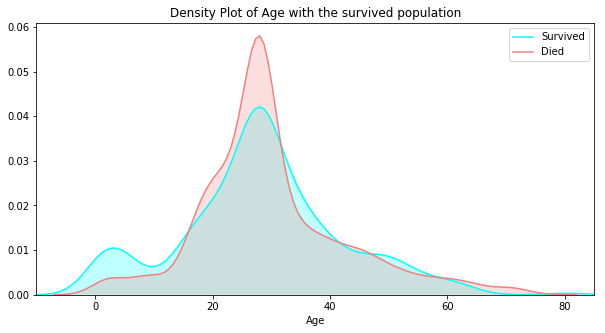

In [12]:
#Density plot of Age against the survival status
plt.figure(figsize=(10,5))
ax = sns.kdeplot(train_data["Age"][train_data.Survived == 1], color="cyan", shade=True)
sns.kdeplot(train_data["Age"][train_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age with the survived population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

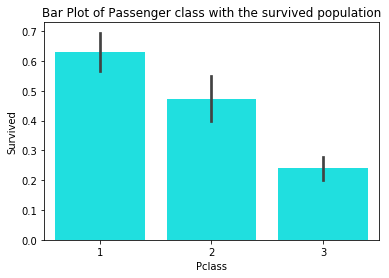

In [37]:
#Passenger class with the survived population
sns.barplot('Pclass', 'Survived', data=train_df, color="cyan")
plt.title('Bar Plot of Passenger class with the survived population')
plt.show()

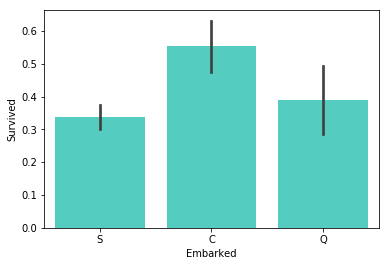

In [39]:
#Embarked column with the survived population
sns.barplot('Embarked', 'Survived', data=train_df, color="turquoise")
plt.show()

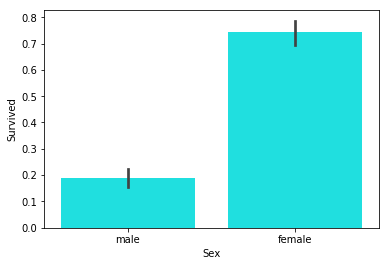

In [41]:
#Gender with the survived population
sns.barplot('Sex', 'Survived', data=train_df, color="aqua")
plt.show()

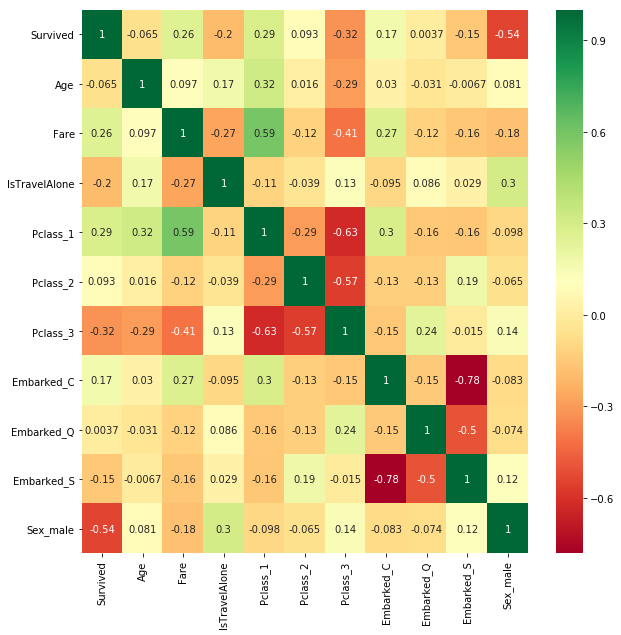

In [13]:
#correlations of each features in dataset
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [33]:
from sklearn.model_selection import train_test_split
X = train_data[["Age","Fare","IsTravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male"]]
y = train_data["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Naveena\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype uint8, int32, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [15]:
import statsmodels.api as sm

logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.483399
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.275     
Dependent Variable: Survived         AIC:              661.8215  
Date:               2019-07-09 14:37 BIC:              697.8558  
No. Observations:   668              Log-Likelihood:   -322.91   
Df Model:           7                LL-Null:          -445.58   
Df Residuals:       660              LLR p-value:      2.7292e-49
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
x1       -0.4042     0.1103    -3.6646   0.0002   -0.6204   -0.1880
x2        0.0454     0.1313     0.3458   0.7295   -0.2119 

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() 
logreg.fit(X_train,y_train)
print(logreg.coef_)

# Predicting the Test set results
y_pred = logreg.predict(X_test)

# Compute the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix \n",cm)
accuracy = logreg.score(X_test,y_test)
print("Accuracy : ", (accuracy * 100),'%')

[[-0.41453479  0.01759143  0.02737626  0.8794033   0.5215685   0.019064
  -0.22212769 -1.205213  ]]
Confusion Matrix 
 [[115  24]
 [ 23  61]]
Accuracy :  78.9237668161435 %


C:\Users\Naveena\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
def sigmoid(w,X):
    return 1.0/(1 + np.exp(-np.dot(X, w.T))) 


def cost(w,X,y):
    y = y[:,None]
    ypred = sigmoid(w,X)
    costval = -np.sum(np.multiply(y, np.log(ypred)) + np.multiply((1 - y), np.log(1 - ypred))) / (len(X)) 
    return costval

#Vanilla gradient descent algorithm
def gradientdescent(X,y,w,iterations,lr=0.001,precision=0.000001):
    costval = cost(w,X,y)
    change_cost = 1
    n_iter = 0
    cost_history = np.zeros(iterations)
    
    
    while(change_cost > precision and n_iter < iterations):
        prev_costval = costval
        #Logistic gradient
        grad = np.dot((sigmoid(w, X) - y[:,None]).T, X)
        w = w - (lr * grad)
        costval = cost(w,X,y)
        cost_history[n_iter] = costval
        change_cost = prev_costval - costval
        n_iter += 1
    return w,n_iter+1,cost_history

def predict(w, X): 
    pred_prob = sigmoid(w, X) 
    pred_value = np.where(pred_prob >= .5, 1, 0) 
    return np.squeeze(pred_value) 

In [18]:
#Numpy array of features
X = np.hstack((np.matrix(np.ones(X_train.shape[0])).T, X_train)) 

# Output vector 
y = y_train
print(X.shape,y.shape)  
# initial w values 
w = np.matrix(np.zeros(X.shape[1])) 
num = 500
# w values after running gradient descent 
w, num_iter,cost_history = gradientdescent(X, y, w,num) 
  
# estimated w values and number of iterations 
print("Estimated regression coefficients:", w) 
print("No. of iterations:", num_iter) 
# predicted labels 
y_pred = predict(w, X)
# number of correctly predicted labels 
print("Correctly predicted labels:", np.sum(y == y_pred),"out of",X.shape[0]) 
print("MSE ",cost_history[0:num_iter])

(668, 9) (668,)
Estimated regression coefficients: [[-0.62940384 -0.42185745  0.01606745  0.03340444  0.89104112  0.52823296
   0.03062518 -0.2128761  -1.22152831]]
No. of iterations: 121
Correctly predicted labels: 531 out of 668
MSE  [0.61430114 0.56923337 0.54101134 0.52206819 0.50869603 0.4988916
 0.49148574 0.4857543  0.48122748 0.47758909 0.47461985 0.47216386
 0.47010792 0.46836832 0.46688218 0.46560154 0.46448937 0.46351673
 0.46266074 0.46190312 0.46122914 0.46062682 0.46008631 0.45959945
 0.45915946 0.45876062 0.45839809 0.45806776 0.45776609 0.45749004
 0.45723698 0.4570046  0.45679088 0.45659405 0.45641256 0.456245
 0.45609014 0.45594688 0.45581423 0.4556913  0.45557728 0.45547145
 0.45537315 0.45528179 0.45519683 0.45511778 0.45504417 0.45497561
 0.45491171 0.45485214 0.45479656 0.4547447  0.45469628 0.45465105
 0.4546088  0.4545693  0.45453237 0.45449782 0.4544655  0.45443524
 0.45440691 0.45438038 0.45435552 0.45433222 0.45431037 0.45428989
 0.45427067 0.45425264 0.45423

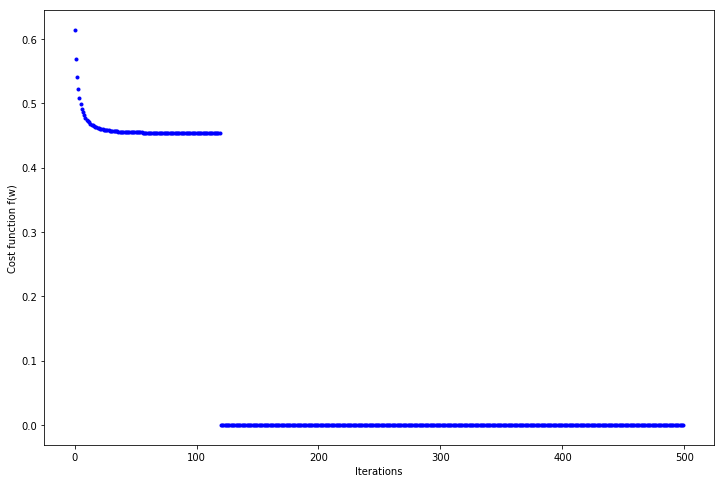

In [19]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Cost function f(w)')
ax.set_xlabel('Iterations')
ax.plot(range(num),cost_history,'b.')


In [20]:
X = np.hstack((np.matrix(np.ones(X_test.shape[0])).T, X_test))
y_pred = predict(w,X)

# Compute the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[115  24]
 [ 23  61]]


In [53]:
def stocashtic_gradient_descent(X,y,w,iterations,lr=0.01):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        costval = 0.0
        for j in range(m):
            y=np.array(y)
            Xi = X[j,:].reshape(1,X.shape[1])
            yi = y[j].reshape(1,1)
            #Logistic gradient
            ypred = sigmoid(w, Xi)
            grad = np.dot((ypred - yi).T, Xi)
            w = w - (lr * grad)
            pos = np.multiply(yi, np.log(ypred))
            neg = np.multiply((1 - yi), np.log(1 - ypred))
            val = -np.sum(pos + neg) / (len(Xi))
            costval += val      
        cost_history[i]  = costval
    return w,cost_history 
        
#Numpy array of features
X = np.hstack((np.matrix(np.ones(X_train.shape[0])).T, X_train)) 

# Output vector 
y = y_train

# initial w values 
w = np.matrix(np.zeros(X.shape[1])) 
num = 100
# w values after running gradient descent 
w,cost_hist = stocashtic_gradient_descent(X, y, w,num) 
  
# estimated w values and number of iterations 
print("Estimated regression coefficients:", w) 

# predicted labels 
y_pred = predict(w, X)
# number of correctly predicted labels 
print("Correctly predicted labels:", np.sum(y == y_pred),"out of",X.shape[0]) 
print("MSE",cost_hist)

Estimated regression coefficients: [[-0.58956742 -0.43644498  0.02953795  0.00284464  0.92863398  0.49671354
   0.00866862 -0.25243295 -1.25132783]]
Correctly predicted labels: 528 out of 668
MSE [359.77816848 317.28063789 311.11586711 309.02479041 308.12793068
 307.70993083 307.50732725 307.40674486 307.35598675 307.33011372
 307.31689776 307.31021505 307.30694052 307.30545202 307.30489485
 307.30481328 307.30496267 307.30521175 307.30549102 307.30576486
 307.30601634 307.30623873 307.30643075 307.30659392 307.30673103
 307.30684531 307.30694    307.30701812 307.30708234 307.307135
 307.30717811 307.30721334 307.3072421  307.30726556 307.30728468
 307.30730026 307.30731295 307.30732328 307.30733169 307.30733854
 307.30734411 307.30734864 307.30735233 307.30735533 307.30735777
 307.30735976 307.30736138 307.30736269 307.30736376 307.30736464
 307.30736535 307.30736592 307.30736639 307.30736677 307.30736709
 307.30736734 307.30736754 307.30736771 307.30736785 307.30736796
 307.30736805 

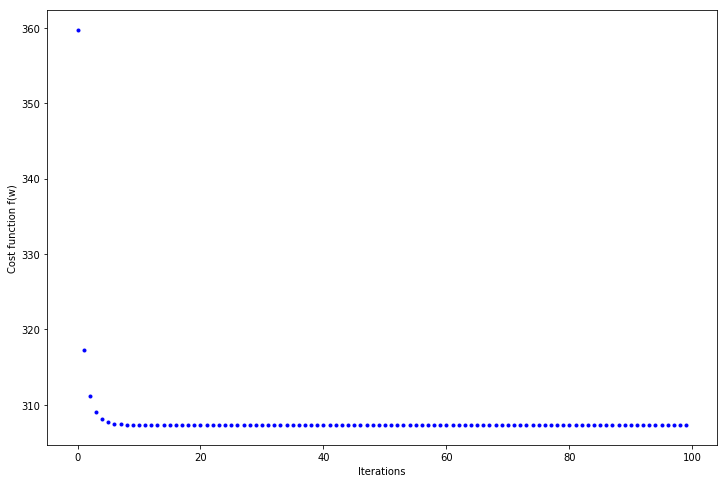

In [54]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Cost function f(w)')
ax.set_xlabel('Iterations')
ax.plot(range(num),cost_hist,'b.')


In [24]:
def minibatch_gradient_descent(X,y,w,iterations,lr=0.0001,batch_size=20):
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m/batch_size)
    
    for it in range(iterations):
        costval =0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            y_pred = sigmoid(w, X_i)
            grad = np.dot((y_pred - y_i).T, X_i)
            w = w - (lr * grad)
            pos = np.multiply(y_i, np.log(y_pred))
            neg = np.multiply((1 - y_i), np.log(1 - y_pred))
            val = -np.sum(pos + neg) / (len(X_i))
            costval += val
            
        cost_history[it]  = costval
        
    return w, cost_history


#Numpy array of features
X = np.hstack((np.matrix(np.ones(X_train.shape[0])).T, X_train)) 
# Output vector 
y = np.asarray(y_train).reshape(-1,1)
print(X.shape,y.shape)  
# initial w values 
w = np.matrix(np.zeros(X.shape[1])) 
print("W",w.shape)
num = 500
# w values after running gradient descent 
w,cost_history = minibatch_gradient_descent(X, y, w,num) 
  
# estimated w values and number of iterations 
print("Estimated regression coefficients:", w) 
# predicted labels 
y_pred = predict(w, X)
# number of correctly predicted labels 
count = 0
for i in range(len(y)):
    if(y_pred[i]==y[i]):
        count += 1

print("Correctly predicted labels:", count,"out of",X.shape[0]) 
print("MSE ",cost_history)

(668, 9) (668, 1)
W (1, 9)
Estimated regression coefficients: [[-0.60283851 -0.35921032  0.07523982  0.0206893   0.76464302  0.47134608
   0.07201926 -0.16486603 -1.18780159]]
Correctly predicted labels: 531 out of 668
MSE  [23.42135828 23.13600015 22.85524194 22.57265598 22.34609689 22.10386772
 21.87497477 21.65280402 21.42303674 21.24473366 21.05130988 20.9080267
 20.72256697 20.63558658 20.43497273 20.25786422 20.08901705 19.95856049
 19.8662296  19.68773408 19.61227931 19.50123923 19.40965315 19.23568551
 19.10775914 19.09214082 18.9279907  18.81866542 18.73681657 18.68242647
 18.65517009 18.61257804 18.44776205 18.34885331 18.37614553 18.36668357
 18.16222658 18.04232556 18.02790111 18.09652128 17.96009836 17.86230572
 17.96185817 17.88186832 17.68602128 17.55297122 17.70869204 17.74646533
 17.60672677 17.48368172 17.41698012 17.462488   17.30020681 17.29857771
 17.21617809 17.20981775 17.15805082 17.23496495 17.09810561 17.28238968
 17.08834703 17.12065428 17.05849948 16.9619377

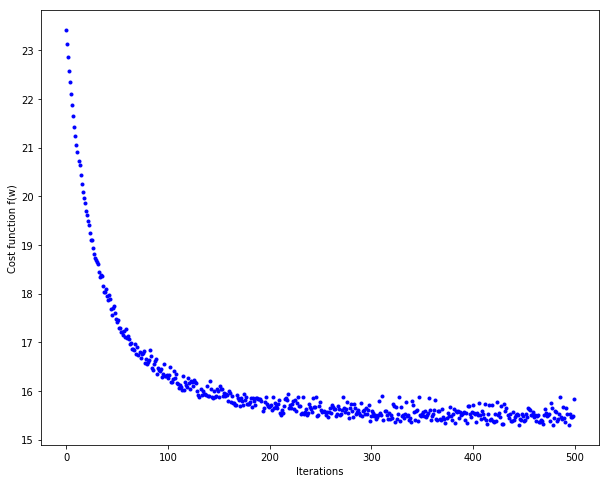

In [25]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Cost function f(w)')
ax.set_xlabel('Iterations')

ax.plot(range(num),cost_history,'b.')

<h3>Kernel SVM</h3>

In [26]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Compute the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix \n",cm)

accuracy = classifier.score(X_test,y_test)
print("Accuracy : ", (accuracy * 100),'%')

Confusion matrix 
 [[125  14]
 [ 30  54]]
Accuracy :  80.26905829596413 %


In [30]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy',oob_score=True, random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Compute the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix \n",cm)

accuracy = classifier.score(X_test,y_test)
print("Accuracy : ", (accuracy * 100),'%')

Confusion matrix 
 [[122  17]
 [ 17  67]]
Accuracy :  84.75336322869956 %


Vanilla Gradient descent
Estimated regression coefficients:<br/>
[[-0.62940384 -0.42185745  0.01606745  0.03340444  0.89104112  0.52823296 0.03062518 -0.2128761  -1.22152831]]
    
Stochastic Gradient descent 
Estimated regression coefficients: <br/>
[[-0.58956742 -0.43644498  0.02953795  0.00284464  0.92863398  0.49671354 0.00866862 -0.25243295 -1.25132783]]
   
Mini batch Gradient Descent
Estimated regression coefficients: <br/>
[[-0.60283804 -0.35919676  0.0752176   0.02067377  0.76465329  0.47130667 0.07199048 -0.16483538 -1.18779339]]
